# Homework 4 Part 1 - Solutions

# Problem 1 (5 points)

**How can you evaluate the (quantitative) performance of a dimensionality reduction algorithm on your dataset?**

Intuitively, a dimensionality reduction algorithm performs well if it eliminates a lot of dimensions from the dataset without losing too much information. One way to measure this is to apply the reverse transformation and measure the reconstruction error. However, not all dimensionality reduction algorithms provide a reverse transformation. 

Alternatively, if you are using dimensionality reduction as a preprocessing step before another Machine Learning algorithm (e.g., a Random Forest classifier), then you can simply measure the performance of that second algorithm; if dimensionality reduction did not lose too much information, then the algorithm should perform just as well as when using the original dataset.

---

# Problem 2 (5 points)

**Consider the S-curve dataset with 3 classes (red, black, blue) depicted below:**

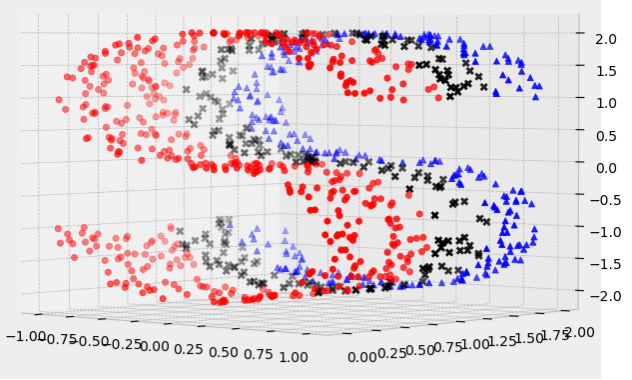

In [3]:
from IPython.display import Image
Image('figures/s-curve.png',width=600)

**Suppose that you ran 3 dimensionality reduction algorithms to reduce this dataset to a 2-dimensional space. The algorithms used were: Locally Linear Embedding (LLE), Principal Component Analysis (PCA) and Fisher’s Linear Discriminant Analysis (LDA) in no particular order. Which performance (A, B or C) corresponds to which algorithm? Justify your answer.**

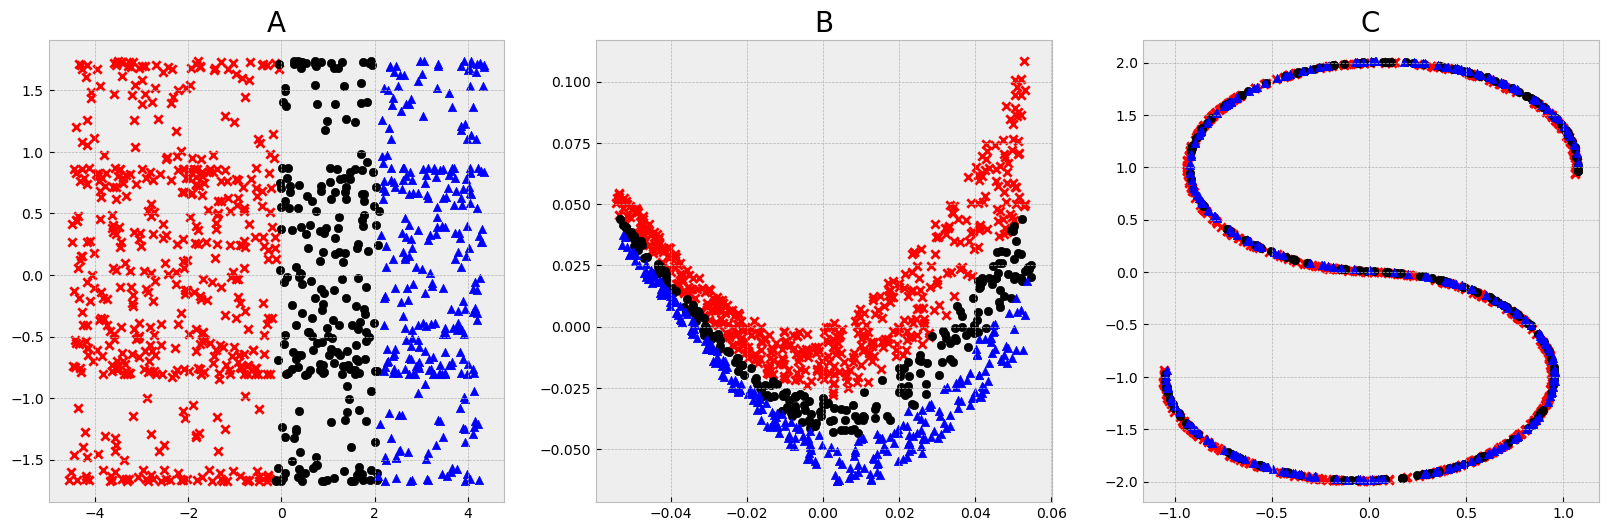

In [5]:
Image('figures/s-curve_dim_red.png',width=800)

The performance in plot B demonstrates an attempt to preserve the structure of the manifold, and thus it must have been used by a manifold learning (non-linear) algorithm. Between the three options provided, LLE is the only manifold learning algorithm capable of preserving manifold structure in a low-dimensional subspace reconstruction.
The performance in plot C, appears to ”squish“ the S-curve dataset along the y-axis regardless of class separability. This suggests that the dimensionality reduction algorithm performs a linear subspace projection and that it is unsupervised. Between the remaining two choices, PCA fits well for performance C.
Lastly, plot A also appears to have ”squished“ the S-curve along the Z-axis, suggesting that it is also a linear subspace projection. Moreover, in this scenario, the classes are separable in the projection space, suggesting a ”lucky“ projection or a supervised dimensionality reduction algorithm. LDA fits the well for performance A.

---

# Problem 3 (5 points)

**Suppose that you have a dataset with a large sample size, but only a small amount of those samples are labeled. The goal is to train a supervised learning model on the entire dataset without the need for manual labeling. Answer the following questions:**

1. (2.5 points) **Explain how you could use K-Means clustering to assist in label annotation.**

K-Means can be used as a semi-supervised learning. We can run K-Means on an unlabeled training set with a decently large number of clusters $k$. Next, we can manually label the $k$ cluster representatives (the cluster centroids). Once this manual assignment is complete, we can perform label propagation. If sample $x$ was assigned to cluster $j$ with cluster centroid $c_j$ , we replace the label $j$ with the manual annotated label for cluster representative $c_j$.

2. (2.5 points) **Describe how you could leverage an auto-encoder neural network to train a model for this dataset.**

We can use an auto-encoder for unsupervised pretraining. We train an autoencoder on the unlabeled data, and then reuse the lower layers (for example, the encoder component of the auto-encoder architecture) as transfer learning. We can add an output layer for the supervised task, and tune the network on a small subset of labeled data.

---

# Problem 4 (5 points)

**Consider the two-dimensional dataset with 3 classes depicted below.**

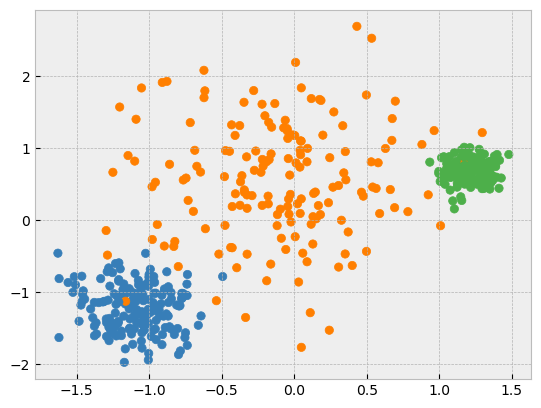

In [7]:
Image('figures/dataset_for_clustering.png', width=400)

**Answer the following questions:**
1. (2.5 points) **Suppose that you ran three clustering algorithms on this dataset, namely: K-means with 3 clusters and euclidean distance, DBSCAN with eps at 0.18, and Agglomerative Clustering in no particular order. Which clustering performance (A, B or C) corresponds to which algorithm? Justify your answer.**

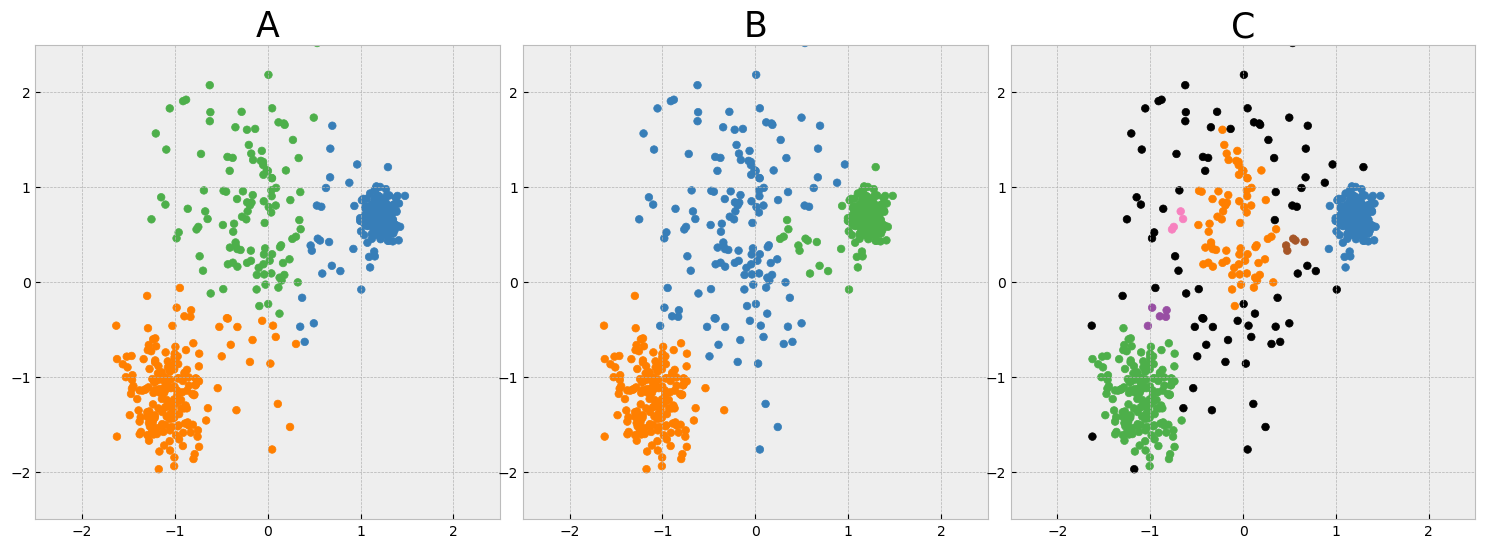

In [10]:
Image('figures/clustering.png', width=1000)

The performance in plot C, it is clear that the clustering algorithm assigned more than 3 clusters, with samples in the outskirts of densely populated clusters being assigned to the same cluster. The clustering algorithm must have the ability to detect noisy samples, and thus performance C was the result of running DBSCAN on the dataset.

The performance in plot A, shows that some samples in the large-variance cluster were assigned to the bottom left compact cluster. This suggests that the clustering algorithm does not consider cluster density or probabilistic assignment. Moreover, the cluster shapes are circular-like, which unlikely indicates the clustering algorithm using for performance A was K-Means with Euclidean distance and k = 3.
Lastly, by the process of elimination, we find that performance in plot B must have been produced by the Agglomerative clustering with 3 clusters.

2. (2.5 points) **Explain the roles of the key parameters in DBSCAN: eps(neighborhood size) and min samples (minimum number of points in a neighborhood).**

The DBSCAN algorithm defines clusters as continuous regions of high density. For each sample, the algorithm counts how many samples are located within a small distance $\epsilon$ (eps or epsilon) from it. This region is called the sample’s $\epsilon$-neighborhood. If a sample has at least min samples in its ϵ-neighborhood (including itself), then it is considered a core instance. In other words, core samples are those that are located in dense regions.

All samples in the neighborhood of a core sample belong to the same cluster. This neighborhood may include other core sample; therefore, a long sequence of neighboring core sample forms a single cluster. Any sample that is not a core instance and does not have one in its neighborhood is considered an anomaly (or an outlier sample).

---

# Problem 5 (5 points)

**What are the limitations of k-Means clustering with Euclidean distance?**

The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries. In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries.

K-Means utilize alternating optimization with the E-M algorithm. Although the E-M procedure is guaranteed to improve the result in each step, there is no assurance that it will lead to the global best solution.

Another common challenge with k-means is that you must tell it how many clusters you expect: it cannot learn the number of clusters from the data.

Because each iteration of k-means must access every point in the dataset, the algorithm can be relatively slow as the number of samples grows.

---

# Problem 6 (5 points)

**Describe the differences and similarities between Logistic Regression and the Perceptron.**

Both Logistic Regression and Perceptron are linear discriminative classifiers. Logistic Regression is probabilistic, which means it will find the discriminant function that maximizes the probability of assignment for all samples.

On the other hand, the Perceptron algorithm starts by initializing the values for the parameters. It iteratively updates the parameters using misclassified samples only.

The Perceptron will only converge to a solution if the classes are linearly separable. Logistic Regression will converge the a solution even if classes are not linearly separable.

---

# Problem 7 (5 points)

**Draw a Perceptron to implement the NAND gate $\overline{A \cap B} = \overline{A} \cup \overline{B}$ using the threshold activation function $\phi(x) = \begin{cases}1, & x>0 \\ 0, & x\leq 0\end{cases}$.**

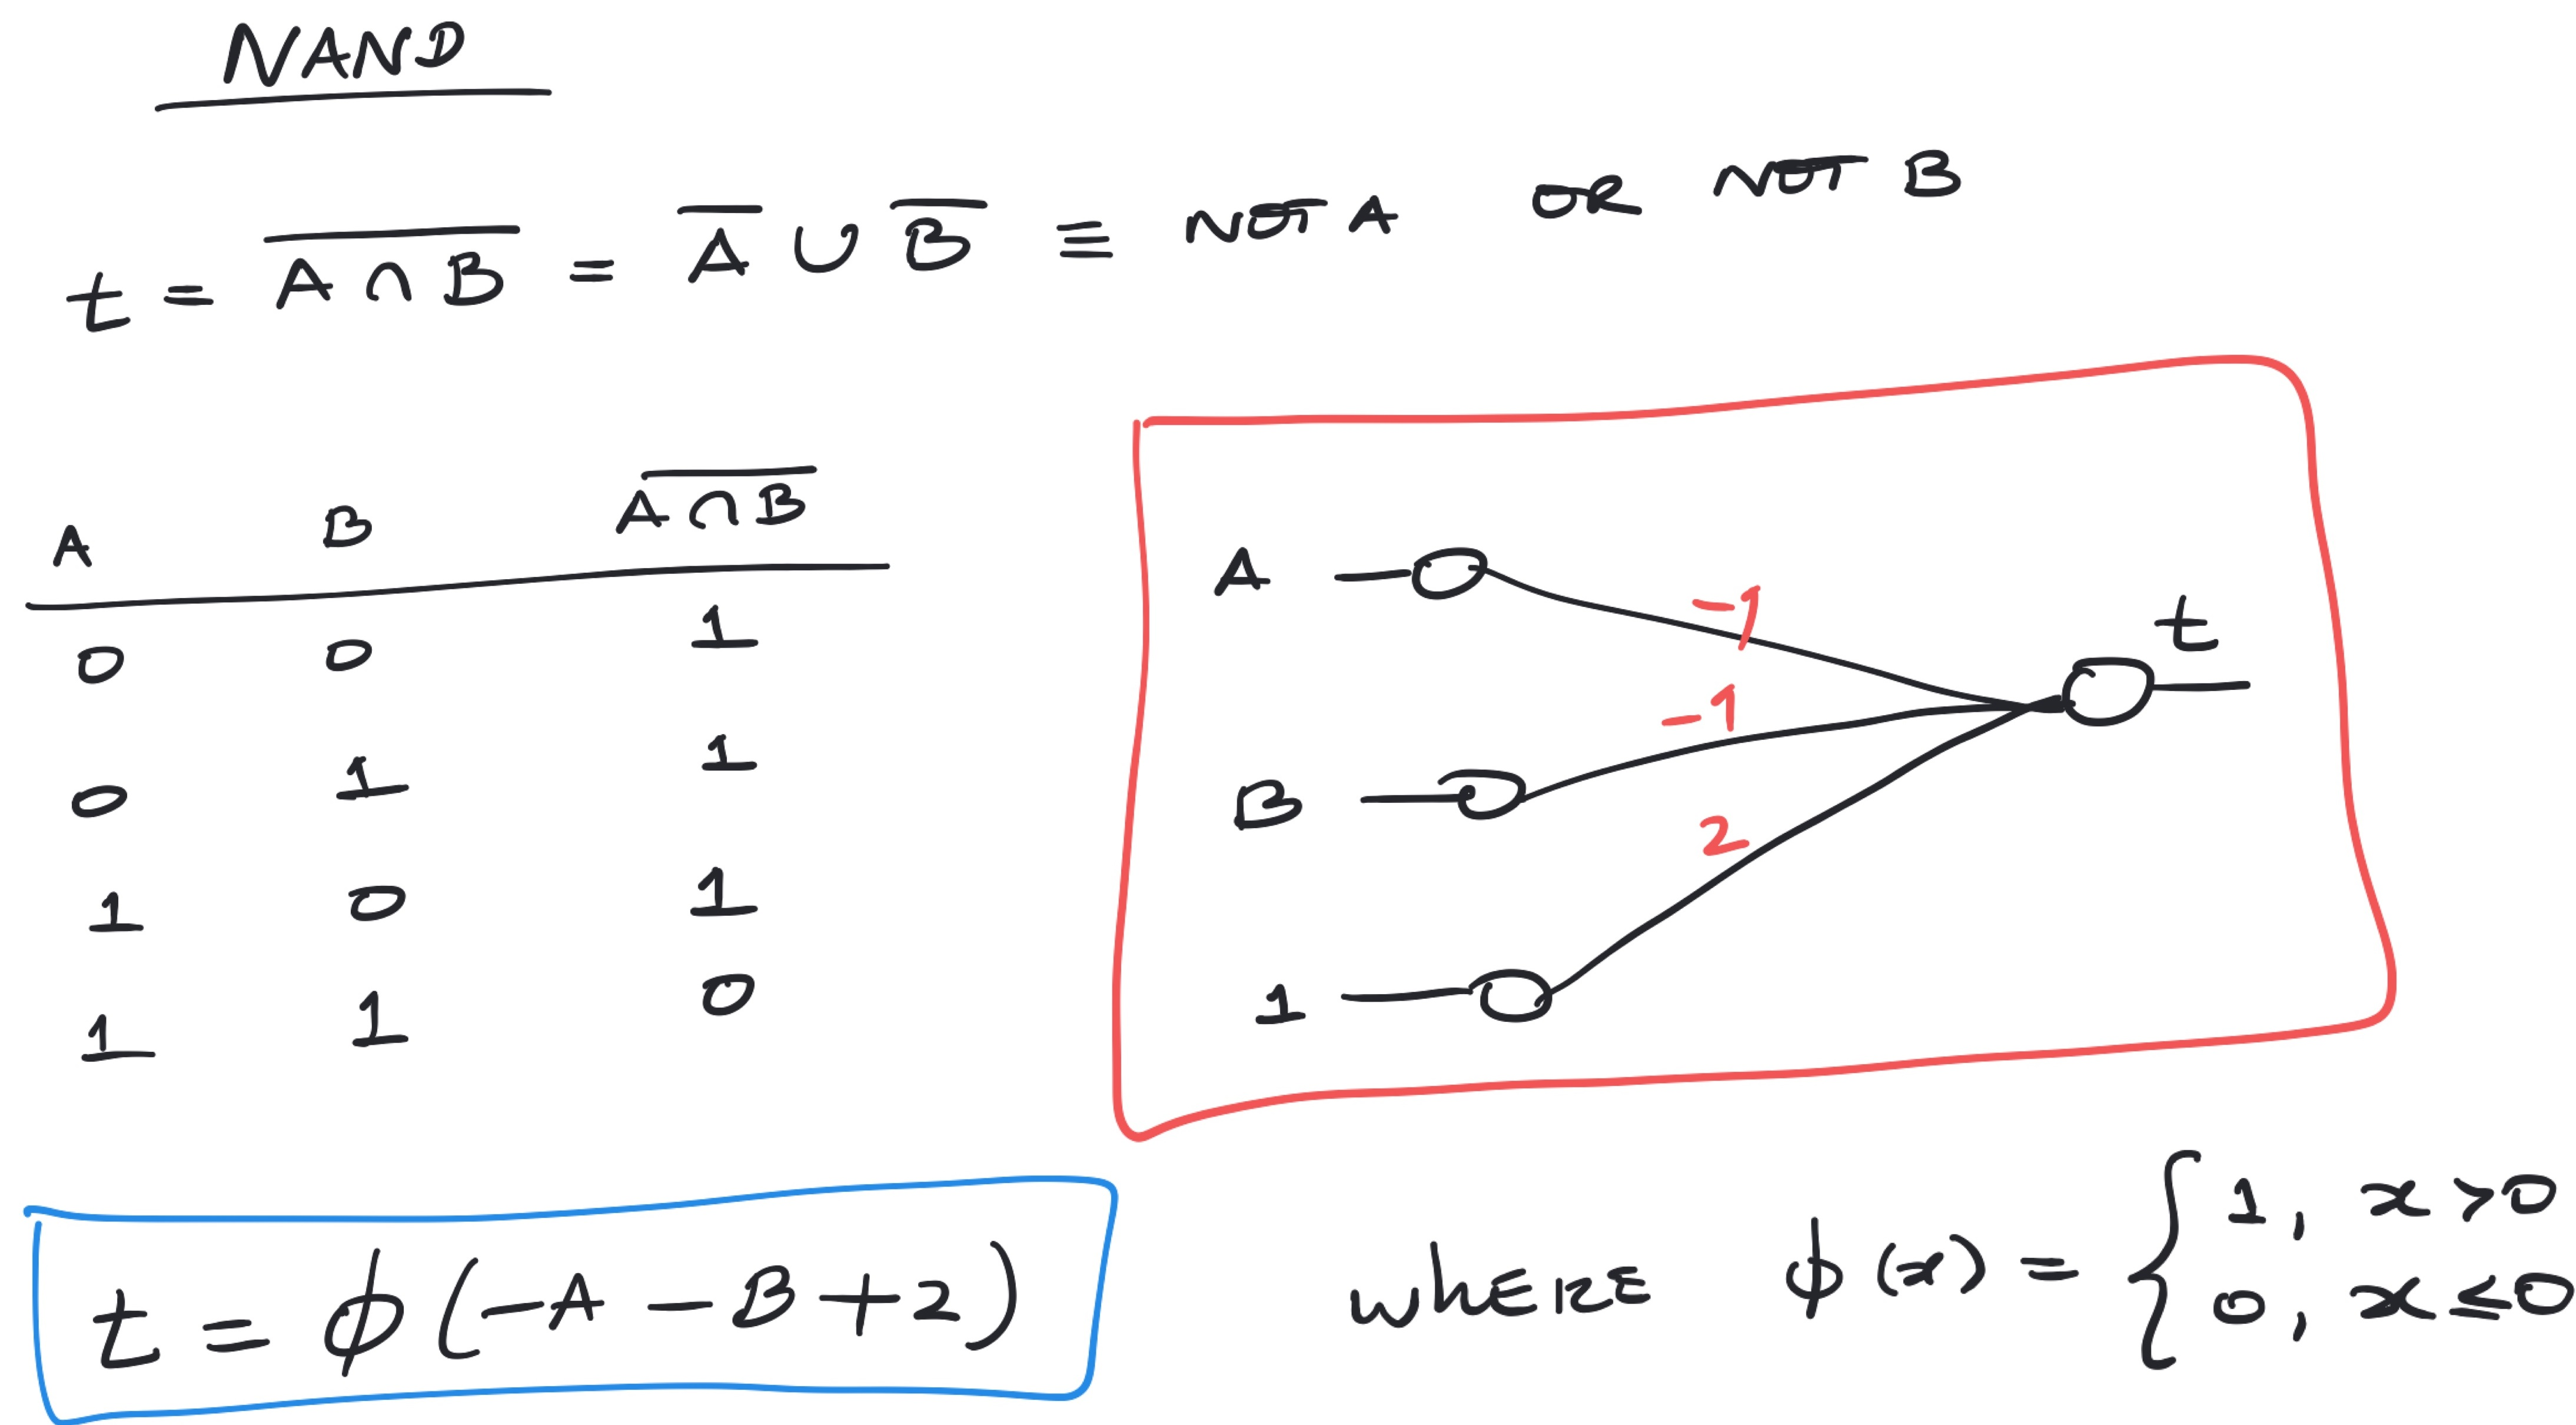

In [4]:
Image('figures/nand_gate.jpg', width=800)

---

# Problem 8 (12.5 points)

**Consider the following two-dimensional data set and desired values for a two-class classification problem:**

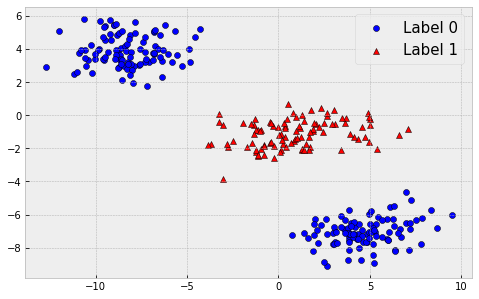

In [5]:
Image('figures/classification.png', width=400)

**For the hard-limit activation function $\phi(x)=\begin{cases}1, & x>0\\ 0, & x\leq 0\end{cases}$, define a neural network structure and the associated parameter values that can solve this classification problem with zero error on this dataset.**

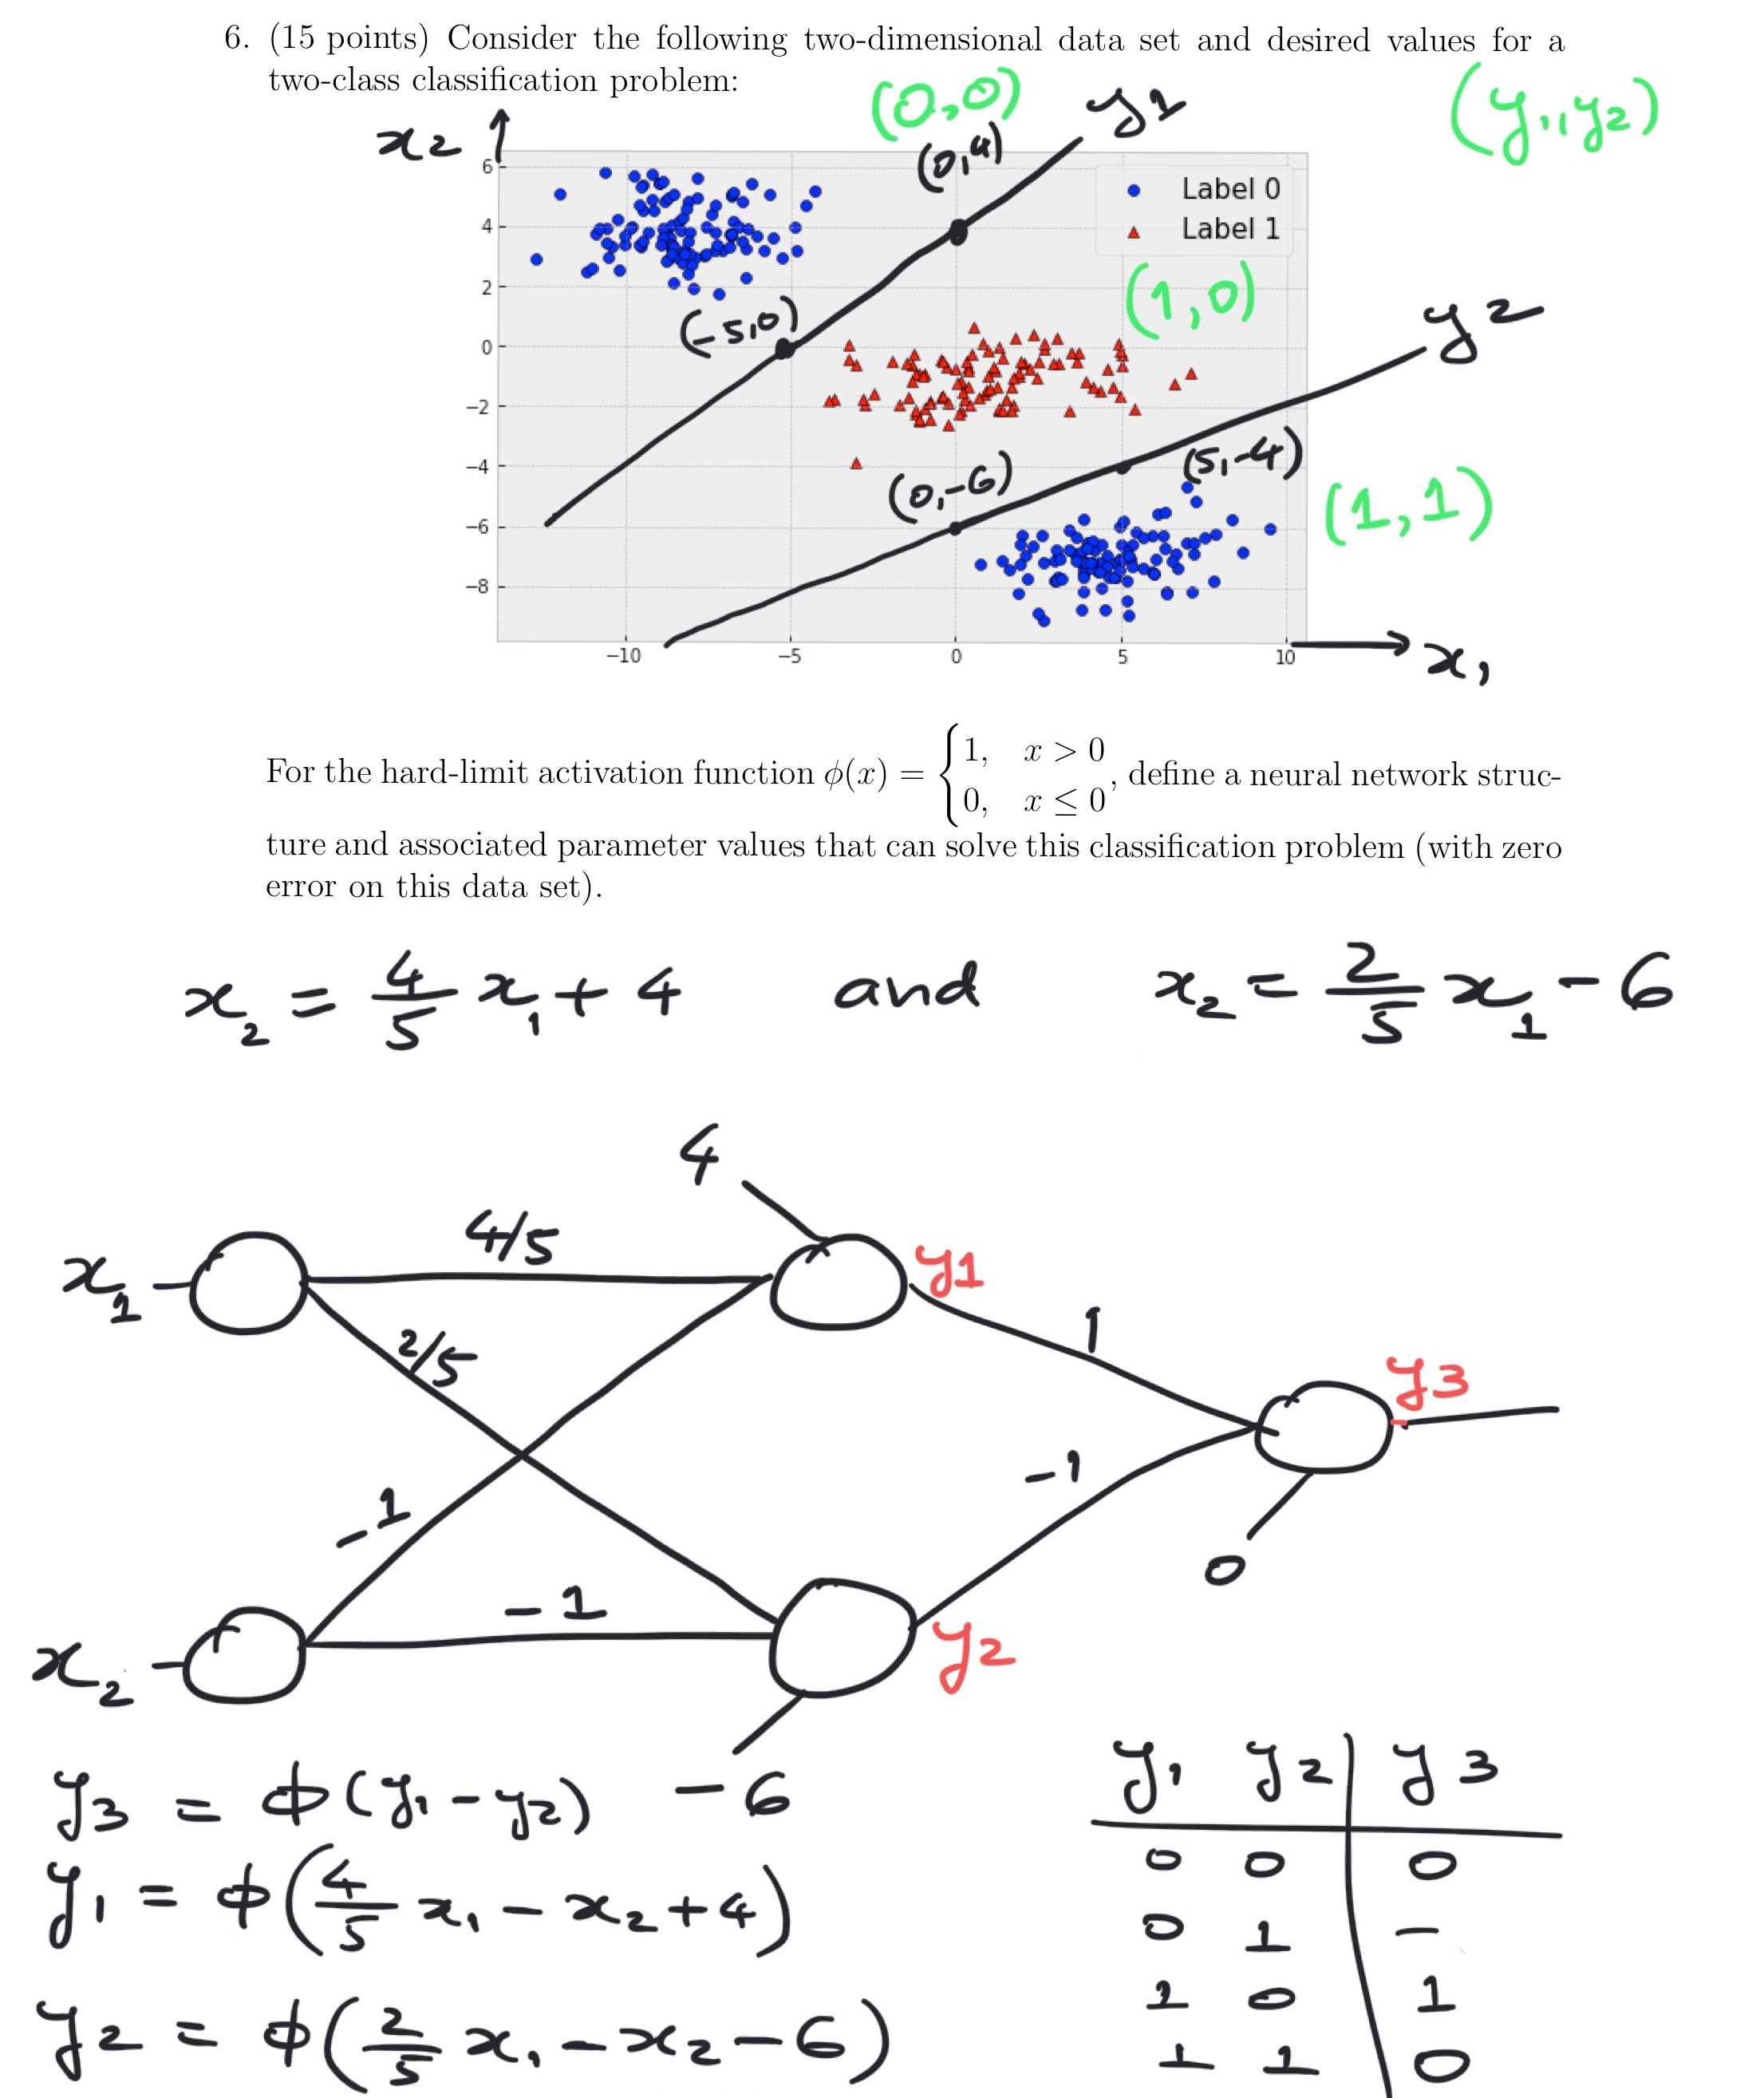

In [6]:
Image('figures/MLP-solution.jpg',width=800)

___